In [1]:
!pip install noisereduce
!pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install pysptk
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 23.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241914 sha256=1e2d4f9ad67ec9304b0c33ca29ab9c046cb1dc54feb3fcafa3e6fa33195df07c
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795eeca8f995f95474c8290b78ee0a6306412dc934f
Successfully built pysptk


In [2]:
pip install transformers

In [3]:
import numpy as np
import os
import pandas as pd
import re
import librosa
import parselmouth
from parselmouth.praat import call
import scipy.stats as stats
import scipy
import pysptk
from scipy.io import wavfile
from tqdm import tqdm
from google.colab import drive

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Proceed with splitting the data and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Google Colab specific
drive.mount('/content/drive')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [4]:
import re
from transformers import BertTokenizer, BertModel
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AdamW
from sklearn.metrics import classification_report
from tqdm import tqdm

# Download NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#Preprocessing

In [6]:
df = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_Updated.csv')

In [7]:
df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Valence,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4",Nervous,NaN,NaN
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4",Nervous,NaN,NaN
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4",Nervous,NaN,NaN
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4",Nervous,NaN,NaN
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4",Nervous,NaN,NaN


In [8]:
import ast

# Apply ast.literal_eval to convert string to list
df['category'] = df['category'].apply(lambda x: ast.literal_eval(x))
print(type(df['category'].iloc[0]))


<class 'list'>


In [9]:
df['category'].iloc[0]

['Frustration', 'Fear', 'Excited']

In [10]:
import pandas as pd
from collections import Counter

# Step 1: Copy df to new_df
new_df = df.copy()

# Step 2: Function to find the most repeated label (case insensitive)
def find_most_repeated_label(label_list):
    # Convert all items to lowercase
    lower_case_labels = [label.lower() for label in label_list]

    # Count the occurrences of each label
    label_counts = Counter(lower_case_labels)

    # Find the label(s) that repeat more than once
    most_common_label, count = label_counts.most_common(1)[0]  # Get the most common label

    # If it repeats more than once, return it, otherwise return None
    if count > 1:
        return most_common_label
    else:
        return None

# Step 3: Apply the function to each row in the 'category' column and create a new column 'most_repeated_label'
new_df['most_repeated_label'] = new_df['category'].apply(lambda x: find_most_repeated_label(x))


In [11]:
new_df.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,...,Dominance,dimension,category,act,val,dom,New_Category,Final_class,Unnamed: 20,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Frustration, Fear, Excited]","2,4","3,3","4,4",Nervous,NaN,NaN,None
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","[Frustration, Fear, Excited]","2,5","2,2","3,4",Nervous,NaN,NaN,None
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","[Fear, Fear, Excited]","2,4","3,3","3,4",Nervous,NaN,NaN,fear
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,...,"[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","[Frustration, Fear, Excited]","3,5","3,2","3,4",Nervous,NaN,NaN,None
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,...,"[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","[Fear, Fear, Excited]","2,4","2,3","3,4",Nervous,NaN,NaN,fear


In [12]:
new_df = new_df.drop(columns=['act', 'val', 'dom', 'New_Category', 'Final_class', 'Unnamed: 20'])


In [13]:
new_df = new_df.drop(columns=['Major_Emotion', 'Major_emotion','Major', 'Arousal', 'Valence', 'Dominance', 'dimension'])


In [14]:
new_df = new_df[new_df['most_repeated_label'].notna()]

In [15]:
len(new_df)

7766

In [16]:
label_counts = new_df['most_repeated_label'].value_counts()

print(label_counts)

most_repeated_label
frustration    2026
neutral        1710
excited        1174
sadness        1075
anger          1042
happiness       586
surprise        102
fear             34
other            14
disgust           3
Name: count, dtype: int64


In [17]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Function to count tokens in the 'Transcript' column
def count_tokens(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return len(tokens)

# Filter rows where the 'Transcript' column has 10 or more tokens
new_df['token_count'] = new_df['Transcript'].apply(count_tokens)
filtered_df = new_df[new_df['token_count'] >= 10]

# Drop the auxiliary 'token_count' column if you no longer need it
filtered_df = filtered_df.drop(columns=['token_count'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
new_df = filtered_df

In [19]:
import pandas as pd

# Modify the labels according to the merging criteria
new_df['most_repeated_label'] = new_df['most_repeated_label'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
new_df = new_df[~new_df['most_repeated_label'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(new_df['most_repeated_label'].value_counts())


most_repeated_label
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


In [20]:
new_df.to_csv('IEMOCAP_MAJOR_LABELLED.csv', index=False)

In [21]:
# Preprocessing function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize text
    return " ".join(tokens)

In [22]:
new_df['cleaned_text'] = new_df['Transcript'].apply(preprocess)

<ipython-input-22-309e3491fb94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_text'] = new_df['Transcript'].apply(preprocess)


In [23]:
# Encode the target labels
label_encoder = LabelEncoder()
new_df['encoded_label'] = label_encoder.fit_transform(new_df['most_repeated_label'])

<ipython-input-23-f86d586bc021>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['encoded_label'] = label_encoder.fit_transform(new_df['most_repeated_label'])


##RoBERTA

In [25]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# Define the model name
MODEL_NAME = 'roberta-base'

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Rest of the code remains the same...
MODEL_NAME = 'roberta-base'

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Custom dataset class remains the same
class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Custom RoBERTa-BiLSTM model
class RoBERTaBiLSTM(nn.Module):
    def __init__(self, n_classes):
        super(RoBERTaBiLSTM, self).__init__()
        self.roberta = AutoModel.from_pretrained(MODEL_NAME)
        self.lstm = nn.LSTM(
            input_size=768,  # RoBERTa hidden size
            hidden_size=256,
            num_layers=2,
            bidirectional=True,
            batch_first=True,
            dropout=0.2
        )
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(512, n_classes)  # 512 = 256*2 (bidirectional)

    def forward(self, input_ids, attention_mask):
        # RoBERTa output
        roberta_output = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask
        )[0]  # Get sequence output

        # BiLSTM
        lstm_output, (hidden, cell) = self.lstm(roberta_output)

        # Get the last hidden state from both directions
        hidden_cat = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        # Dropout and classification
        output = self.dropout(hidden_cat)
        return self.fc(output)

# Modified training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / len(data_loader.dataset), sum(losses) / len(losses)

# Modified evaluation function
def eval_model(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), predictions, true_labels

# Data preparation
train_texts, test_texts, train_labels, test_labels = train_test_split(
    new_df['cleaned_text'], new_df['encoded_label'], test_size=0.2, random_state=42
)

train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Initialize the model
model = RoBERTaBiLSTM(n_classes=len(label_encoder.classes_))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Train loss: {train_loss:.4f}')

    # Evaluate after each epoch
    test_acc, preds, true_labels = eval_model(model, test_loader, device)
    print(f'Test Accuracy: {test_acc:.4f}')
    print(classification_report(true_labels, preds, target_names=label_encoder.classes_))

# Save the model
torch.save(model.state_dict(), "roberta_bilstm_emotion_model.pt")
tokenizer.save_pretrained("roberta_bilstm_tokenizer")

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Train accuracy: 0.5394, Train loss: 1.1283
Test Accuracy: 0.6682
              precision    recall  f1-score   support

       anger       0.72      0.80      0.76       396
       happy       0.65      0.78      0.71       202
     neutral       0.50      0.33      0.40       186
     sadness       0.67      0.56      0.61       111

    accuracy                           0.67       895
   macro avg       0.64      0.62      0.62       895
weighted avg       0.65      0.67      0.65       895

Epoch 2/5


Train accuracy: 0.7170, Train loss: 0.7674
Test Accuracy: 0.7006
              precision    recall  f1-score   support

       anger       0.71      0.87      0.78       396
       happy       0.71      0.82      0.76       202
     neutral       0.64      0.30      0.41       186
     sadness       0.70      0.53      0.61       111

    accuracy                           0.70       895
   macro avg       0.69      0.63      0.64       895
weighted avg       0.69      0.70      0.68       895

Epoch 3/5


Train accuracy: 0.8015, Train loss: 0.5572
Test Accuracy: 0.7285
              precision    recall  f1-score   support

       anger       0.77      0.82      0.79       396
       happy       0.72      0.86      0.79       202
     neutral       0.60      0.46      0.52       186
     sadness       0.75      0.62      0.68       111

    accuracy                           0.73       895
   macro avg       0.71      0.69      0.70       895
weighted avg       0.72      0.73      0.72       895

Epoch 4/5


Train accuracy: 0.8619, Train loss: 0.4109
Test Accuracy: 0.7374
              precision    recall  f1-score   support

       anger       0.80      0.78      0.79       396
       happy       0.80      0.81      0.80       202
     neutral       0.56      0.60      0.58       186
     sadness       0.71      0.69      0.70       111

    accuracy                           0.74       895
   macro avg       0.72      0.72      0.72       895
weighted avg       0.74      0.74      0.74       895

Epoch 5/5


Train accuracy: 0.9007, Train loss: 0.3154
Test Accuracy: 0.7464
              precision    recall  f1-score   support

       anger       0.80      0.81      0.81       396
       happy       0.76      0.85      0.81       202
     neutral       0.61      0.56      0.58       186
     sadness       0.73      0.63      0.68       111

    accuracy                           0.75       895
   macro avg       0.73      0.71      0.72       895
weighted avg       0.74      0.75      0.74       895



('roberta_bilstm_tokenizer/tokenizer_config.json',
 'roberta_bilstm_tokenizer/special_tokens_map.json',
 'roberta_bilstm_tokenizer/vocab.json',
 'roberta_bilstm_tokenizer/merges.txt',
 'roberta_bilstm_tokenizer/added_tokens.json',
 'roberta_bilstm_tokenizer/tokenizer.json')

#RoBERTa + BiLSTM

Epoch 1/5


Train accuracy: 0.9169, Train loss: 0.2495
Validation Accuracy: 0.7408
              precision    recall  f1-score   support

       anger       0.79      0.81      0.80       396
       happy       0.74      0.88      0.80       202
     neutral       0.61      0.51      0.55       186
     sadness       0.74      0.63      0.68       111

    accuracy                           0.74       895
   macro avg       0.72      0.71      0.71       895
weighted avg       0.74      0.74      0.74       895

Epoch 2/5


Train accuracy: 0.9245, Train loss: 0.2277
Validation Accuracy: 0.7229
              precision    recall  f1-score   support

       anger       0.77      0.81      0.79       396
       happy       0.74      0.83      0.78       202
     neutral       0.57      0.46      0.51       186
     sadness       0.70      0.66      0.68       111

    accuracy                           0.72       895
   macro avg       0.70      0.69      0.69       895
weighted avg       0.71      0.72      0.72       895

Epoch 3/5


Train accuracy: 0.9480, Train loss: 0.1650
Validation Accuracy: 0.7531
              precision    recall  f1-score   support

       anger       0.83      0.82      0.82       396
       happy       0.76      0.87      0.81       202
     neutral       0.60      0.54      0.57       186
     sadness       0.71      0.68      0.69       111

    accuracy                           0.75       895
   macro avg       0.72      0.73      0.72       895
weighted avg       0.75      0.75      0.75       895

Epoch 4/5


Train accuracy: 0.9474, Train loss: 0.1582
Validation Accuracy: 0.7397
              precision    recall  f1-score   support

       anger       0.81      0.80      0.81       396
       happy       0.73      0.85      0.78       202
     neutral       0.60      0.55      0.58       186
     sadness       0.71      0.63      0.67       111

    accuracy                           0.74       895
   macro avg       0.71      0.71      0.71       895
weighted avg       0.74      0.74      0.74       895

Epoch 5/5


Train accuracy: 0.9589, Train loss: 0.1272
Validation Accuracy: 0.7173
              precision    recall  f1-score   support

       anger       0.85      0.70      0.77       396
       happy       0.70      0.87      0.78       202
     neutral       0.56      0.57      0.56       186
     sadness       0.65      0.76      0.70       111

    accuracy                           0.72       895
   macro avg       0.69      0.72      0.70       895
weighted avg       0.73      0.72      0.72       895


Plotting Confusion Matrix for Validation Set...


<Figure size 1000x800 with 0 Axes>

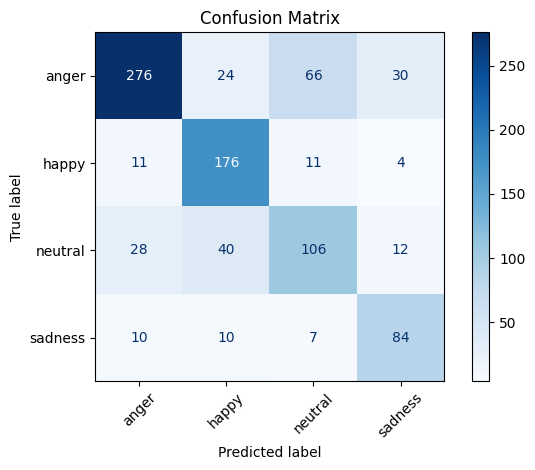


Plotting Learning Curves...


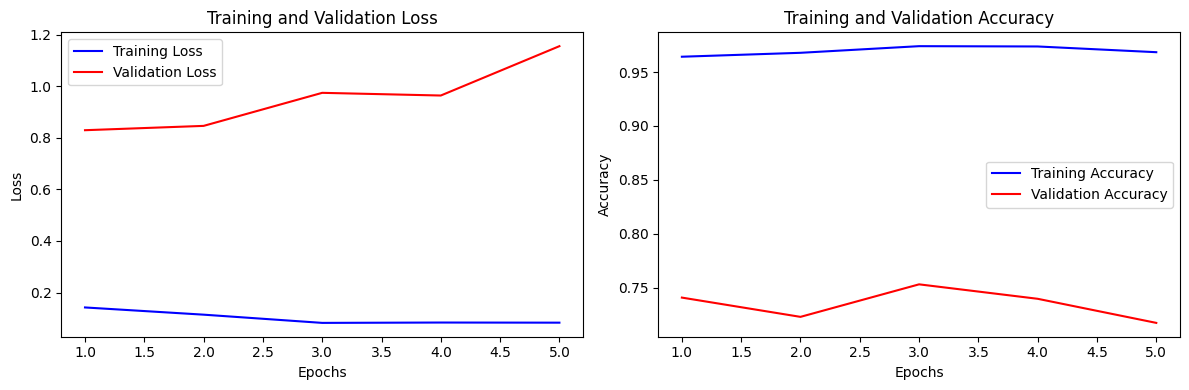


Plotting Normalized Confusion Matrix...


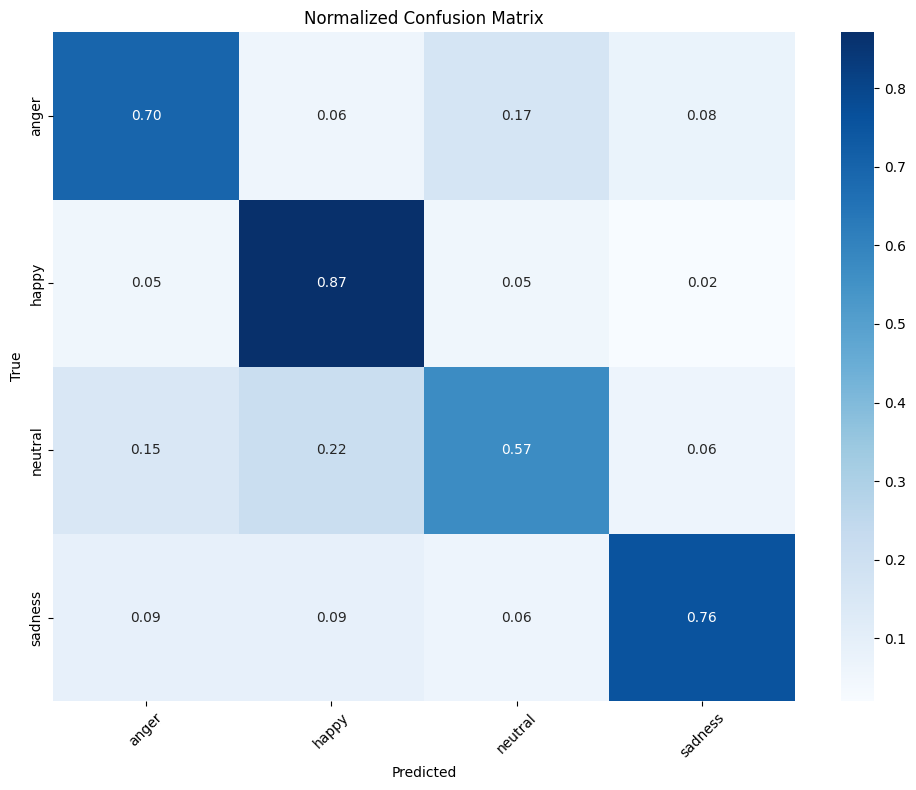

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Lists to store metrics for learning curves
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

def evaluate_and_save_metrics(model, train_loader, test_loader, loss_fn, device):
    """
    Evaluate model and save metrics for both training and validation sets
    """
    # Training metrics
    model.eval()
    train_loss = 0
    train_correct = 0
    train_preds = []
    train_true = []

    with torch.no_grad():
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)
            train_loss += loss.item()

            _, preds = torch.max(outputs, dim=1)
            train_correct += torch.sum(preds == labels)
            train_preds.extend(preds.cpu().numpy())
            train_true.extend(labels.cpu().numpy())

    # Validation metrics
    val_loss = 0
    val_correct = 0
    val_preds = []
    val_true = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, dim=1)
            val_correct += torch.sum(preds == labels)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(labels.cpu().numpy())

    # Calculate average losses and accuracies
    train_loss = train_loss / len(train_loader)
    train_acc = train_correct.double() / len(train_loader.dataset)
    val_loss = val_loss / len(test_loader)
    val_acc = val_correct.double() / len(test_loader.dataset)

    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc.cpu())
    val_losses.append(val_loss)
    val_accuracies.append(val_acc.cpu())

    return train_preds, train_true, val_preds, val_true

def plot_confusion_matrix(true_labels, predictions, class_names):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_learning_curves():
    """
    Plot learning curves for loss and accuracy
    """
    epochs = range(1, len(train_losses) + 1)

    # Plot training & validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')bat
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Modified training loop with metrics collection
epochs = 5
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device)
    print(f'Train accuracy: {train_acc:.4f}, Train loss: {train_loss:.4f}')

    # Evaluate and save metrics
    train_preds, train_true, val_preds, val_true = evaluate_and_save_metrics(
        model, train_loader, test_loader, loss_fn, device
    )

    # Print validation metrics
    test_acc = val_accuracies[-1]
    print(f'Validation Accuracy: {test_acc:.4f}')
    print(classification_report(val_true, val_preds, target_names=label_encoder.classes_))

# After training, plot the results
print("\nPlotting Confusion Matrix for Validation Set...")
plot_confusion_matrix(val_true, val_preds, label_encoder.classes_)

print("\nPlotting Learning Curves...")
plot_learning_curves()

# Optional: Plot normalized confusion matrix
def plot_normalized_confusion_matrix(true_labels, predictions, class_names):
    """
    Plot normalized confusion matrix
    """
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("\nPlotting Normalized Confusion Matrix...")
plot_normalized_confusion_matrix(val_true, val_preds, label_encoder.classes_)

# Save the plots if needed
def save_plots(filename_prefix):
    """
    Save all plots to files
    """
    # Save confusion matrix
    plt.figure(figsize=(10, 8))
    plot_confusion_matrix(val_true, val_preds, label_encoder.classes_)
    plt.savefig(f'{filename_prefix}_confusion_matrix.png')

    # Save learning curves
    plt.figure(figsize=(12, 4))
    plot_learning_curves()
    plt.savefig(f'{filename_prefix}_learning_curves.png')

    # Save normalized confusion matrix
    plt.figure(figsize=(10, 8))
    plot_normalized_confusion_matrix(val_true, val_preds, label_encoder.classes_)
    plt.savefig(f'{filename_prefix}_normalized_confusion_matrix.png')

# Uncomment to save plots
# save_plots('emotion_classification')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/5


Training: 100%|██████████| 224/224 [01:25<00:00,  2.61it/s]


Train Loss: 1.1031, Train Acc: 0.5453
Val Loss: 0.8898, Val Acc: 0.6559

Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.69      0.74       396
       happy       0.57      0.86      0.69       202
     neutral       0.57      0.39      0.46       186
     sadness       0.56      0.60      0.58       111

    accuracy                           0.66       895
   macro avg       0.62      0.64      0.62       895
weighted avg       0.67      0.66      0.65       895


Epoch 2/5


Training: 100%|██████████| 224/224 [01:25<00:00,  2.62it/s]


Train Loss: 0.6535, Train Acc: 0.7662
Val Loss: 0.7800, Val Acc: 0.6827

Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.64      0.73       396
       happy       0.72      0.78      0.75       202
     neutral       0.54      0.59      0.56       186
     sadness       0.51      0.83      0.63       111

    accuracy                           0.68       895
   macro avg       0.66      0.71      0.67       895
weighted avg       0.72      0.68      0.69       895


Epoch 3/5


Training: 100%|██████████| 224/224 [01:25<00:00,  2.63it/s]


Train Loss: 0.4026, Train Acc: 0.8674
Val Loss: 0.8506, Val Acc: 0.7050

Classification Report:
              precision    recall  f1-score   support

       anger       0.81      0.74      0.78       396
       happy       0.77      0.76      0.76       202
     neutral       0.51      0.59      0.54       186
     sadness       0.63      0.68      0.66       111

    accuracy                           0.71       895
   macro avg       0.68      0.69      0.68       895
weighted avg       0.72      0.71      0.71       895


Epoch 4/5


Training: 100%|██████████| 224/224 [01:25<00:00,  2.63it/s]


Train Loss: 0.2682, Train Acc: 0.9172
Val Loss: 0.8990, Val Acc: 0.7229

Classification Report:
              precision    recall  f1-score   support

       anger       0.74      0.87      0.80       396
       happy       0.76      0.73      0.74       202
     neutral       0.63      0.43      0.51       186
     sadness       0.68      0.68      0.68       111

    accuracy                           0.72       895
   macro avg       0.70      0.68      0.68       895
weighted avg       0.72      0.72      0.71       895


Epoch 5/5


Training: 100%|██████████| 224/224 [01:25<00:00,  2.63it/s]


Train Loss: 0.1911, Train Acc: 0.9410
Val Loss: 0.9690, Val Acc: 0.7285

Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.80      0.79       396
       happy       0.77      0.78      0.78       202
     neutral       0.55      0.57      0.56       186
     sadness       0.73      0.65      0.69       111

    accuracy                           0.73       895
   macro avg       0.71      0.70      0.71       895
weighted avg       0.73      0.73      0.73       895



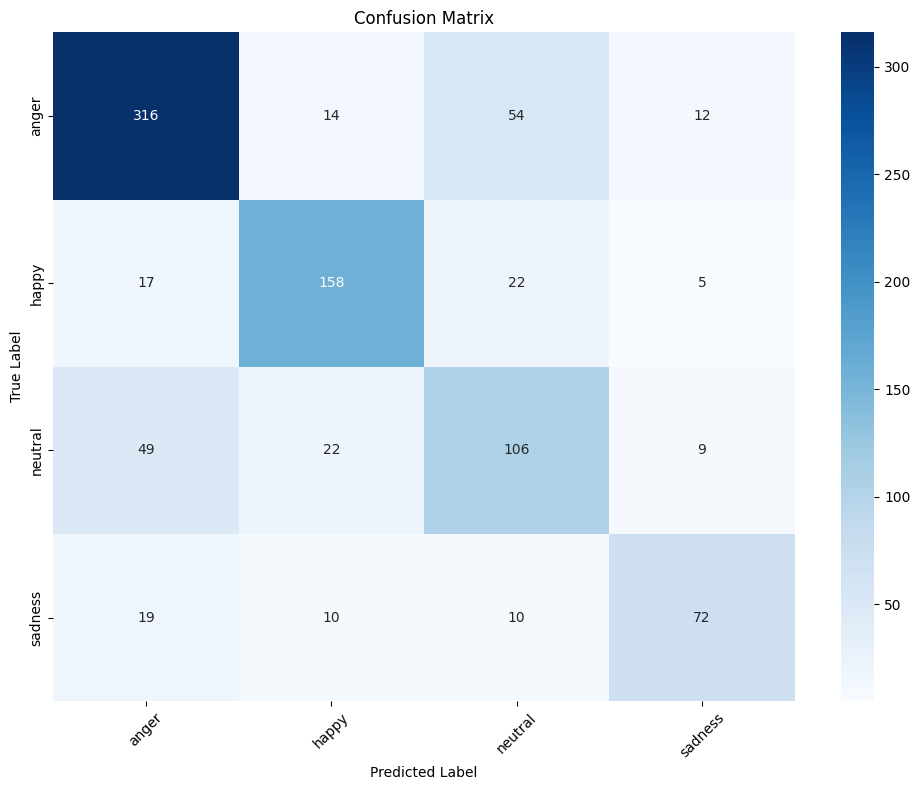

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

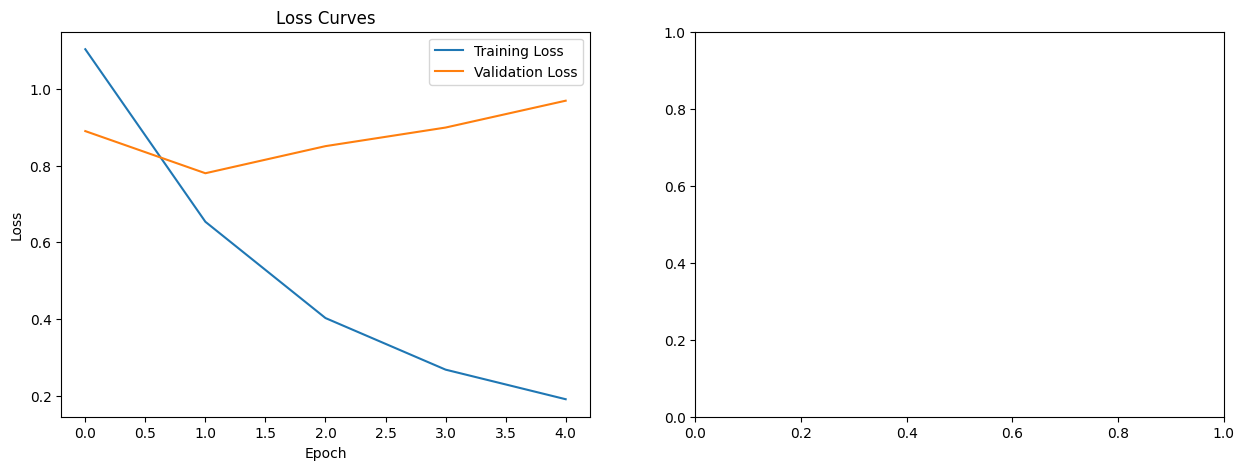

In [29]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Define the model name
MODEL_NAME = 'bert-base-uncased'

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# Custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# BERT-BiLSTM model
class BERTBiLSTM(nn.Module):
    def __init__(self, n_classes, dropout=0.2):
        super(BERTBiLSTM, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.lstm = nn.LSTM(
            input_size=768,  # BERT hidden size
            hidden_size=256,
            num_layers=2,
            bidirectional=True,
            batch_first=True,
            dropout=dropout
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(512, n_classes)  # 512 = 256*2 (bidirectional)

    def forward(self, input_ids, attention_mask):
        # BERT output
        bert_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )[0]

        # BiLSTM
        lstm_output, (hidden, cell) = self.lstm(bert_output)

        # Get the last hidden state from both directions
        hidden_cat = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        # Dropout and classification
        output = self.dropout(hidden_cat)
        return self.fc(output)

# Training metrics tracker
class MetricsTracker:
    def __init__(self):
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []
        self.epoch_metrics = []

    def add_metrics(self, train_loss, train_acc, val_loss, val_acc):
        self.train_losses.append(train_loss)
        self.train_accuracies.append(train_acc)
        self.val_losses.append(val_loss)
        self.val_accuracies.append(val_acc)

    def add_epoch_metrics(self, epoch_dict):
        self.epoch_metrics.append(epoch_dict)

# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(data_loader, desc='Training'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs, labels)

        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += len(labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    return correct_predictions.double() / total_predictions, total_loss / len(data_loader)

# Evaluation function
def evaluate_model(model, data_loader, loss_fn, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs, labels)

            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_loss += loss.item()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return (correct_predictions.double() / len(data_loader.dataset),
            total_loss / len(data_loader),
            all_preds,
            all_labels)

# Visualization functions
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# def plot_learning_curves(metrics_tracker):
#     plt.figure(figsize=(15, 5))

#     # Loss curve
#     plt.subplot(1, 2, 1)
#     plt.plot(metrics_tracker.train_losses, label='Training Loss')
#     plt.plot(metrics_tracker.val_losses, label='Validation Loss')
#     plt.title('Loss Curves')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Accuracy curve
#     plt.subplot(1, 2, 2)
#     plt.plot(metrics_tracker.train_accuracies, label='Training Accuracy')
#     plt.plot(metrics_tracker.val_accuracies, label='Validation Accuracy')
#     plt.title('Accuracy Curves')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

# Main training loop
def train_and_evaluate(model, train_loader, test_loader, optimizer, loss_fn,
                      device, epochs, class_names):
    metrics_tracker = MetricsTracker()
    best_val_acc = 0

    for epoch in range(epochs):
        print(f'\nEpoch {epoch + 1}/{epochs}')

        # Training
        train_acc, train_loss = train_epoch(
            model, train_loader, loss_fn, optimizer, device
        )

        # Validation
        val_acc, val_loss, val_preds, val_labels = evaluate_model(
            model, test_loader, loss_fn, device
        )

        # Store metrics
        metrics_tracker.add_metrics(train_loss, train_acc, val_loss, val_acc)

        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Print classification report
        print('\nClassification Report:')
        print(classification_report(val_labels, val_preds, target_names=class_names))

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_bert_bilstm_model.pt')

        # Plot confusion matrix for the last epoch
        if epoch == epochs - 1:
            plot_confusion_matrix(val_labels, val_preds, class_names)

    # Plot learning curves
    plot_learning_curves(metrics_tracker)

    return metrics_tracker

# Data preparation and training
def prepare_and_train():
    # Prepare your data
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        new_df['cleaned_text'], new_df['encoded_label'],
        test_size=0.2, random_state=42
    )

    # Create datasets
    train_dataset = EmotionDataset(train_texts.tolist(), train_labels.tolist())
    test_dataset = EmotionDataset(test_texts.tolist(), test_labels.tolist())

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16)

    # Initialize model
    model = BERTBiLSTM(n_classes=len(label_encoder.classes_))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Initialize optimizer and loss function
    optimizer = AdamW(model.parameters(), lr=2e-5)
    loss_fn = nn.CrossEntropyLoss()

    # Train and evaluate
    metrics_tracker = train_and_evaluate(
        model=model,
        train_loader=train_loader,
        test_loader=test_loader,
        optimizer=optimizer,
        loss_fn=loss_fn,
        device=device,
        epochs=5,
        class_names=label_encoder.classes_
    )

    return model, metrics_tracker

# Run training
model, metrics_tracker = prepare_and_train()

# Save final model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'metrics': {
        'train_losses': metrics_tracker.train_losses,
        'train_accuracies': metrics_tracker.train_accuracies,
        'val_losses': metrics_tracker.val_losses,
        'val_accuracies': metrics_tracker.val_accuracies
    }
}, 'final_bert_bilstm_model.pt')

In [34]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from transformers import BertTokenizer, BertModel, AdamW
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import f1_score

class KFoldMetricsTracker:
    def __init__(self, k_folds):
        self.k_folds = k_folds
        self.fold_metrics = {i: {
            'train_losses': [],
            'train_accuracies': [],
            'val_losses': [],
            'val_accuracies': [],
            'val_f1_scores': [],  # Added F1 scores
            'confusion_matrices': [],
            'classification_reports': []
        } for i in range(k_folds)}

        self.best_models = {}
        self.best_f1_scores = {i: 0 for i in range(k_folds)}  # Changed to track F1 scores

    def add_metrics(self, fold, train_loss, train_acc, val_loss, val_acc, val_f1):
        self.fold_metrics[fold]['train_losses'].append(train_loss)
        self.fold_metrics[fold]['train_accuracies'].append(train_acc)
        self.fold_metrics[fold]['val_losses'].append(val_loss)
        self.fold_metrics[fold]['val_accuracies'].append(val_acc)
        self.fold_metrics[fold]['val_f1_scores'].append(val_f1)

    def add_fold_results(self, fold, confusion_matrix, classification_report):
        self.fold_metrics[fold]['confusion_matrices'].append(confusion_matrix)
        self.fold_metrics[fold]['classification_reports'].append(classification_report)

    def save_best_model(self, fold, model, f1_score):
        if f1_score > self.best_f1_scores[fold]:
            self.best_f1_scores[fold] = f1_score
            self.best_models[fold] = model.state_dict()

def k_fold_cross_validation(df, k_folds=5, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    metrics_tracker = KFoldMetricsTracker(k_folds)

    dataset = EmotionDataset(df['cleaned_text'].tolist(), df['encoded_label'].tolist())
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
        print(f'\nFold {fold + 1}/{k_folds}')
        print('-' * 50)

        train_subsampler = SubsetRandomSampler(train_ids)
        val_subsampler = SubsetRandomSampler(val_ids)

        train_loader = DataLoader(dataset, batch_size=16, sampler=train_subsampler)
        val_loader = DataLoader(dataset, batch_size=16, sampler=val_subsampler)

        model = BERTBiLSTM(n_classes=len(label_encoder.classes_)).to(device)
        optimizer = AdamW(model.parameters(), lr=2e-5)
        loss_fn = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')

            # Training phase
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0

            for batch in tqdm(train_loader, desc='Training'):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)

                optimizer.zero_grad()
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = loss_fn(outputs, labels)

                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

            train_loss = train_loss / len(train_loader)
            train_acc = train_correct / train_total

            # Validation phase
            model.eval()
            val_loss = 0
            val_correct = 0
            val_total = 0
            all_preds = []
            all_labels = []

            with torch.no_grad():
                for batch in tqdm(val_loader, desc='Validation'):
                    input_ids = batch['input_ids'].to(device)
                    attention_mask = batch['attention_mask'].to(device)
                    labels = batch['label'].to(device)

                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    loss = loss_fn(outputs, labels)

                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    val_total += labels.size(0)
                    val_correct += (predicted == labels).sum().item()

                    all_preds.extend(predicted.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            val_loss = val_loss / len(val_loader)
            val_acc = val_correct / val_total

            # Calculate weighted F1 score
            val_f1 = f1_score(all_labels, all_preds, average='weighted')

            # Store metrics
            metrics_tracker.add_metrics(fold, train_loss, train_acc, val_loss, val_acc, val_f1)

            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}')

            # Save best model based on F1 score
            metrics_tracker.save_best_model(fold, model, val_f1)

        # Store fold results
        cm = confusion_matrix(all_labels, all_preds)
        cr = classification_report(all_labels, all_preds, target_names=label_encoder.classes_)
        metrics_tracker.add_fold_results(fold, cm, cr)

        print('\nClassification Report:')
        print(cr)

    return metrics_tracker

def print_k_fold_summary(metrics_tracker):
    final_val_accuracies = []
    final_val_losses = []
    final_val_f1_scores = []  # Added F1 scores

    print("\nK-Fold Cross Validation Results:")
    print("=" * 50)

    for fold in range(metrics_tracker.k_folds):
        val_acc = metrics_tracker.fold_metrics[fold]['val_accuracies'][-1]
        val_loss = metrics_tracker.fold_metrics[fold]['val_losses'][-1]
        val_f1 = metrics_tracker.fold_metrics[fold]['val_f1_scores'][-1]  # Get F1 score

        final_val_accuracies.append(val_acc)
        final_val_losses.append(val_loss)
        final_val_f1_scores.append(val_f1)

        print(f"\nFold {fold+1}:")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"Validation Weighted F1: {val_f1:.4f}")
        print("\nClassification Report:")
        print(metrics_tracker.fold_metrics[fold]['classification_reports'][-1])

    print("\nOverall Results:")
    print("=" * 50)
    print(f"Average Validation Accuracy: {np.mean(final_val_accuracies):.4f} ± {np.std(final_val_accuracies):.4f}")
    print(f"Average Validation Loss: {np.mean(final_val_losses):.4f} ± {np.std(final_val_losses):.4f}")
    print(f"Average Weighted F1 Score: {np.mean(final_val_f1_scores):.4f} ± {np.std(final_val_f1_scores):.4f}")

# Run k-fold cross validation
metrics_tracker = k_fold_cross_validation(new_df, k_folds=5, epochs=5)

# Print summary with F1 scores
print_k_fold_summary(metrics_tracker)


Fold 1/5
--------------------------------------------------
Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 1.0859, Train Acc: 0.5517
Val Loss: 0.8171, Val Acc: 0.6905, Val F1: 0.6860
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.62it/s]


Train Loss: 0.6271, Train Acc: 0.7822
Val Loss: 0.8114, Val Acc: 0.6983, Val F1: 0.7014
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.65it/s]


Train Loss: 0.4022, Train Acc: 0.8683
Val Loss: 0.7897, Val Acc: 0.7151, Val F1: 0.7151
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.65it/s]


Train Loss: 0.2823, Train Acc: 0.9114
Val Loss: 0.8860, Val Acc: 0.7296, Val F1: 0.7224
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.62it/s]


Train Loss: 0.2092, Train Acc: 0.9357
Val Loss: 0.9538, Val Acc: 0.7307, Val F1: 0.7319

Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.79      0.80       396
       happy       0.82      0.74      0.78       202
     neutral       0.56      0.56      0.56       186
     sadness       0.64      0.78      0.70       111

    accuracy                           0.73       895
   macro avg       0.70      0.72      0.71       895
weighted avg       0.74      0.73      0.73       895


Fold 2/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 1.0986, Train Acc: 0.5549
Val Loss: 0.8245, Val Acc: 0.6946, Val F1: 0.6855
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.63it/s]


Train Loss: 0.6597, Train Acc: 0.7688
Val Loss: 0.7265, Val Acc: 0.7405, Val F1: 0.7356
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.4059, Train Acc: 0.8697
Val Loss: 0.7821, Val Acc: 0.7394, Val F1: 0.7348
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.59it/s]


Train Loss: 0.2560, Train Acc: 0.9237
Val Loss: 0.9124, Val Acc: 0.7271, Val F1: 0.7233
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.1979, Train Acc: 0.9393
Val Loss: 0.9437, Val Acc: 0.7371, Val F1: 0.7376

Classification Report:
              precision    recall  f1-score   support

       anger       0.79      0.83      0.81       402
       happy       0.84      0.71      0.77       210
     neutral       0.59      0.58      0.59       172
     sadness       0.61      0.71      0.66       110

    accuracy                           0.74       894
   macro avg       0.71      0.71      0.70       894
weighted avg       0.74      0.74      0.74       894


Fold 3/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.70it/s]


Train Loss: 1.0785, Train Acc: 0.5569
Val Loss: 0.7886, Val Acc: 0.7248, Val F1: 0.7182
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.70it/s]


Train Loss: 0.6335, Train Acc: 0.7674
Val Loss: 0.7172, Val Acc: 0.7315, Val F1: 0.7332
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.60it/s]


Train Loss: 0.3749, Train Acc: 0.8776
Val Loss: 0.7604, Val Acc: 0.7438, Val F1: 0.7437
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.2599, Train Acc: 0.9198
Val Loss: 0.9765, Val Acc: 0.7304, Val F1: 0.7131
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.1801, Train Acc: 0.9430
Val Loss: 0.9106, Val Acc: 0.7248, Val F1: 0.7147

Classification Report:
              precision    recall  f1-score   support

       anger       0.76      0.81      0.79       386
       happy       0.72      0.88      0.79       207
     neutral       0.64      0.43      0.52       181
     sadness       0.69      0.62      0.65       120

    accuracy                           0.72       894
   macro avg       0.70      0.69      0.69       894
weighted avg       0.72      0.72      0.71       894


Fold 4/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.64it/s]


Train Loss: 1.0779, Train Acc: 0.5572
Val Loss: 0.8754, Val Acc: 0.6600, Val F1: 0.6553
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.68it/s]


Train Loss: 0.6465, Train Acc: 0.7680
Val Loss: 0.7207, Val Acc: 0.7315, Val F1: 0.7321
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.62it/s]


Train Loss: 0.3930, Train Acc: 0.8720
Val Loss: 0.8073, Val Acc: 0.7260, Val F1: 0.7254
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.57it/s]


Train Loss: 0.2654, Train Acc: 0.9195
Val Loss: 0.8739, Val Acc: 0.7271, Val F1: 0.7221
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.60it/s]


Train Loss: 0.1988, Train Acc: 0.9385
Val Loss: 0.9466, Val Acc: 0.7058, Val F1: 0.7140

Classification Report:
              precision    recall  f1-score   support

       anger       0.82      0.75      0.78       383
       happy       0.85      0.71      0.77       226
     neutral       0.47      0.61      0.53       178
     sadness       0.60      0.71      0.65       107

    accuracy                           0.71       894
   macro avg       0.69      0.69      0.68       894
weighted avg       0.73      0.71      0.71       894


Fold 5/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.69it/s]


Train Loss: 1.0817, Train Acc: 0.5524
Val Loss: 0.8087, Val Acc: 0.7081, Val F1: 0.6991
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.69it/s]


Train Loss: 0.6555, Train Acc: 0.7772
Val Loss: 0.6931, Val Acc: 0.7271, Val F1: 0.7279
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.64it/s]


Train Loss: 0.4254, Train Acc: 0.8588
Val Loss: 0.7118, Val Acc: 0.7282, Val F1: 0.7304
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.2883, Train Acc: 0.9075
Val Loss: 0.8655, Val Acc: 0.7036, Val F1: 0.7059
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]

Train Loss: 0.1928, Train Acc: 0.9416
Val Loss: 0.8816, Val Acc: 0.7416, Val F1: 0.7393

Classification Report:
              precision    recall  f1-score   support

       anger       0.76      0.87      0.81       406
       happy       0.87      0.73      0.79       201
     neutral       0.54      0.53      0.54       160
     sadness       0.73      0.62      0.67       127

    accuracy                           0.74       894
   macro avg       0.73      0.69      0.70       894
weighted avg       0.74      0.74      0.74       894


K-Fold Cross Validation Results:

Fold 1:
Validation Accuracy: 0.7307
Validation Loss: 0.9538
Validation Weighted F1: 0.7319

Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.79      0.80       396
       happy       0.82      0.74      0.78       202
     neutral       0.56      0.56      0.56       186
     sadness       0.64      0.78      0.70       111

    accuracy                   

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from transformers import BertTokenizer, BertModel, AdamW
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd


class KFoldMetricsTracker:
    def __init__(self, k_folds):
        self.k_folds = k_folds
        self.fold_metrics = {i: {
            'train_losses': [],
            'train_accuracies': [],
            'val_losses': [],
            'val_accuracies': [],
            'val_f1_scores': [],  # Added F1 scores
            'confusion_matrices': [],
            'classification_reports': []
        } for i in range(k_folds)}

        self.best_models = {}
        self.best_f1_scores = {i: 0 for i in range(k_folds)}  # Changed to track F1 scores

    def add_metrics(self, fold, train_loss, train_acc, val_loss, val_acc, val_f1):
        self.fold_metrics[fold]['train_losses'].append(train_loss)
        self.fold_metrics[fold]['train_accuracies'].append(train_acc)
        self.fold_metrics[fold]['val_losses'].append(val_loss)
        self.fold_metrics[fold]['val_accuracies'].append(val_acc)
        self.fold_metrics[fold]['val_f1_scores'].append(val_f1)

    def add_fold_results(self, fold, confusion_matrix, classification_report):
        self.fold_metrics[fold]['confusion_matrices'].append(confusion_matrix)
        self.fold_metrics[fold]['classification_reports'].append(classification_report)

    def save_best_model(self, fold, model, f1_score):
        if f1_score > self.best_f1_scores[fold]:
            self.best_f1_scores[fold] = f1_score
            self.best_models[fold] = model.state_dict()

def k_fold_cross_validation(df, k_folds=5, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    metrics_tracker = KFoldMetricsTracker(k_folds)

    dataset = EmotionDataset(df['cleaned_text'].tolist(), df['encoded_label'].tolist())
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset)):
        print(f'\nFold {fold + 1}/{k_folds}')
        print('-' * 50)

        train_subsampler = SubsetRandomSampler(train_ids)
        val_subsampler = SubsetRandomSampler(val_ids)

        train_loader = DataLoader(dataset, batch_size=16, sampler=train_subsampler)
        val_loader = DataLoader(dataset, batch_size=16, sampler=val_subsampler)

        model = RoBERTaBiLSTM(n_classes=len(label_encoder.classes_)).to(device)
        optimizer = AdamW(model.parameters(), lr=2e-5)
        loss_fn = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')

            # Training phase
            model.train()
            train_loss = 0
            train_correct = 0
            train_total = 0

            for batch in tqdm(train_loader, desc='Training'):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['label'].to(device)

                optimizer.zero_grad()
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = loss_fn(outputs, labels)

                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()

            train_loss = train_loss / len(train_loader)
            train_acc = train_correct / train_total

            # Validation phase
            model.eval()
            val_loss = 0
            val_correct = 0
            val_total = 0
            all_preds = []
            all_labels = []

            with torch.no_grad():
                for batch in tqdm(val_loader, desc='Validation'):
                    input_ids = batch['input_ids'].to(device)
                    attention_mask = batch['attention_mask'].to(device)
                    labels = batch['label'].to(device)

                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    loss = loss_fn(outputs, labels)

                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    val_total += labels.size(0)
                    val_correct += (predicted == labels).sum().item()

                    all_preds.extend(predicted.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())

            val_loss = val_loss / len(val_loader)
            val_acc = val_correct / val_total

            # Calculate weighted F1 score
            val_f1 = f1_score(all_labels, all_preds, average='weighted')

            # Store metrics
            metrics_tracker.add_metrics(fold, train_loss, train_acc, val_loss, val_acc, val_f1)

            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}')

            # Save best model based on F1 score
            metrics_tracker.save_best_model(fold, model, val_f1)

        # Store fold results
        cm = confusion_matrix(all_labels, all_preds)
        cr = classification_report(all_labels, all_preds, target_names=label_encoder.classes_)
        metrics_tracker.add_fold_results(fold, cm, cr)

        print('\nClassification Report:')
        print(cr)

    return metrics_tracker

def print_k_fold_summary(metrics_tracker):
    final_val_accuracies = []
    final_val_losses = []
    final_val_f1_scores = []  # Added F1 scores

    print("\nK-Fold Cross Validation Results:")
    print("=" * 50)

    for fold in range(metrics_tracker.k_folds):
        val_acc = metrics_tracker.fold_metrics[fold]['val_accuracies'][-1]
        val_loss = metrics_tracker.fold_metrics[fold]['val_losses'][-1]
        val_f1 = metrics_tracker.fold_metrics[fold]['val_f1_scores'][-1]  # Get F1 score

        final_val_accuracies.append(val_acc)
        final_val_losses.append(val_loss)
        final_val_f1_scores.append(val_f1)

        print(f"\nFold {fold+1}:")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"Validation Weighted F1: {val_f1:.4f}")
        print("\nClassification Report:")
        print(metrics_tracker.fold_metrics[fold]['classification_reports'][-1])

    print("\nOverall Results:")
    print("=" * 50)
    print(f"Average Validation Accuracy: {np.mean(final_val_accuracies):.4f} ± {np.std(final_val_accuracies):.4f}")
    print(f"Average Validation Loss: {np.mean(final_val_losses):.4f} ± {np.std(final_val_losses):.4f}")
    print(f"Average Weighted F1 Score: {np.mean(final_val_f1_scores):.4f} ± {np.std(final_val_f1_scores):.4f}")

# Run k-fold cross validation
metrics_tracker = k_fold_cross_validation(new_df, k_folds=5, epochs=5)

# Print summary with F1 scores
print_k_fold_summary(metrics_tracker)


Fold 1/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.63it/s]


Train Loss: 1.0772, Train Acc: 0.5570
Val Loss: 0.8166, Val Acc: 0.6983, Val F1: 0.6839
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.68it/s]


Train Loss: 0.6308, Train Acc: 0.7699
Val Loss: 0.7434, Val Acc: 0.7151, Val F1: 0.7127
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.3949, Train Acc: 0.8674
Val Loss: 0.7797, Val Acc: 0.7117, Val F1: 0.7157
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.59it/s]


Train Loss: 0.2624, Train Acc: 0.9158
Val Loss: 0.8972, Val Acc: 0.7285, Val F1: 0.7293
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.62it/s]


Train Loss: 0.1874, Train Acc: 0.9390
Val Loss: 0.9531, Val Acc: 0.7251, Val F1: 0.7275

Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.77      0.79       396
       happy       0.80      0.78      0.79       202
     neutral       0.54      0.59      0.56       186
     sadness       0.68      0.70      0.69       111

    accuracy                           0.73       895
   macro avg       0.70      0.71      0.71       895
weighted avg       0.73      0.73      0.73       895


Fold 2/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.68it/s]


Train Loss: 1.0997, Train Acc: 0.5507
Val Loss: 0.8674, Val Acc: 0.6622, Val F1: 0.6654
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.69it/s]


Train Loss: 0.6406, Train Acc: 0.7722
Val Loss: 0.7351, Val Acc: 0.7226, Val F1: 0.7256
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.67it/s]


Train Loss: 0.3958, Train Acc: 0.8683
Val Loss: 0.7523, Val Acc: 0.7226, Val F1: 0.7275
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 0.2540, Train Acc: 0.9228
Val Loss: 0.8763, Val Acc: 0.7226, Val F1: 0.7249
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 0.1733, Train Acc: 0.9477
Val Loss: 0.9650, Val Acc: 0.7260, Val F1: 0.7265

Classification Report:
              precision    recall  f1-score   support

       anger       0.82      0.74      0.78       402
       happy       0.72      0.82      0.77       210
     neutral       0.61      0.58      0.59       172
     sadness       0.62      0.73      0.67       110

    accuracy                           0.73       894
   macro avg       0.69      0.72      0.70       894
weighted avg       0.73      0.73      0.73       894


Fold 3/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.65it/s]


Train Loss: 1.0826, Train Acc: 0.5457
Val Loss: 0.8278, Val Acc: 0.6756, Val F1: 0.6584
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.67it/s]


Train Loss: 0.6222, Train Acc: 0.7794
Val Loss: 0.7269, Val Acc: 0.7327, Val F1: 0.7275
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.62it/s]


Train Loss: 0.3892, Train Acc: 0.8689
Val Loss: 0.7645, Val Acc: 0.7438, Val F1: 0.7415
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.67it/s]


Train Loss: 0.2560, Train Acc: 0.9192
Val Loss: 0.8166, Val Acc: 0.7405, Val F1: 0.7429
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.64it/s]


Train Loss: 0.1864, Train Acc: 0.9441
Val Loss: 0.8651, Val Acc: 0.7371, Val F1: 0.7388

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.78      0.80       386
       happy       0.81      0.83      0.82       207
     neutral       0.55      0.62      0.59       181
     sadness       0.65      0.59      0.62       120

    accuracy                           0.74       894
   macro avg       0.71      0.71      0.71       894
weighted avg       0.74      0.74      0.74       894


Fold 4/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.65it/s]


Train Loss: 1.1307, Train Acc: 0.5354
Val Loss: 0.8553, Val Acc: 0.6812, Val F1: 0.6725
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 0.6732, Train Acc: 0.7601
Val Loss: 0.7269, Val Acc: 0.7338, Val F1: 0.7362
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 0.4023, Train Acc: 0.8725
Val Loss: 0.7840, Val Acc: 0.7260, Val F1: 0.7333
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.64it/s]


Train Loss: 0.2662, Train Acc: 0.9172
Val Loss: 0.8386, Val Acc: 0.7271, Val F1: 0.7236
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.2164, Train Acc: 0.9332
Val Loss: 0.8395, Val Acc: 0.7394, Val F1: 0.7418

Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.73      0.78       383
       happy       0.80      0.88      0.83       226
     neutral       0.54      0.62      0.58       178
     sadness       0.65      0.68      0.67       107

    accuracy                           0.74       894
   macro avg       0.71      0.73      0.72       894
weighted avg       0.75      0.74      0.74       894


Fold 5/5
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.65it/s]


Train Loss: 1.0895, Train Acc: 0.5426
Val Loss: 0.7980, Val Acc: 0.6969, Val F1: 0.6881
Epoch 2/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.64it/s]


Train Loss: 0.6474, Train Acc: 0.7666
Val Loss: 0.7026, Val Acc: 0.7315, Val F1: 0.7306
Epoch 3/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.61it/s]


Train Loss: 0.4262, Train Acc: 0.8622
Val Loss: 0.7269, Val Acc: 0.7371, Val F1: 0.7420
Epoch 4/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.66it/s]


Train Loss: 0.2796, Train Acc: 0.9122
Val Loss: 0.8813, Val Acc: 0.7069, Val F1: 0.7137
Epoch 5/5


Validation: 100%|██████████| 56/56 [00:07<00:00,  7.67it/s]

Train Loss: 0.1971, Train Acc: 0.9391
Val Loss: 0.8775, Val Acc: 0.7293, Val F1: 0.7321

Classification Report:
              precision    recall  f1-score   support

       anger       0.83      0.77      0.80       406
       happy       0.78      0.80      0.79       201
     neutral       0.52      0.56      0.54       160
     sadness       0.64      0.70      0.67       127

    accuracy                           0.73       894
   macro avg       0.69      0.71      0.70       894
weighted avg       0.74      0.73      0.73       894


K-Fold Cross Validation Results:

Fold 1:
Validation Accuracy: 0.7251
Validation Loss: 0.9531
Validation Weighted F1: 0.7275

Classification Report:
              precision    recall  f1-score   support

       anger       0.80      0.77      0.79       396
       happy       0.80      0.78      0.79       202
     neutral       0.54      0.59      0.56       186
     sadness       0.68      0.70      0.69       111

    accuracy                   